In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [98]:
data = pd.read_csv('/content/Realistic_Energy_Efficiency_Smart_Buildings.csv')

In [99]:
data

,Timestamp,Occupancy,Energy_Consumption_kWh,Temperature_C,Humidity_%,Wind_Speed_kmh,HVAC_Usage
0,2023-01-01 00:00:00,21,140.455902,22.000000,54.967142,10.601750,0
1,2023-01-01 01:00:00,38,86.167919,22.007173,48.617357,13.602284,0
2,2023-01-01 02:00:00,3,84.893685,22.014346,56.476885,5.707069,0
3,2023-01-01 03:00:00,42,85.689891,22.021519,65.230299,18.477579,0
4,2023-01-01 04:00:00,4,70.732565,22.028692,47.658466,0.000000,0
...,...,...,...,...,...,...,...
17515,2024-12-30 19:00:00,39,75.707156,21.971308,48.202675,11.896359,0
17516,2024-12-30 20:00:00,19,144.787042,21.978481,50.716641,12.455865,1
17517,2024-12-30 21:00:00,21,115.226610,21.985654,56.966315,6.097528,1
17518,2024-12-30 22:00:00,41,125.257053,21.992827,56.373330,7.544449,0


In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               17520 non-null  object 
 1   Occupancy               17520 non-null  int64  
 2   Energy_Consumption_kWh  17520 non-null  float64
 3   Temperature_C           17520 non-null  float64
 4   Humidity_%              17520 non-null  float64
 5   Wind_Speed_kmh          17520 non-null  float64
 6   HVAC_Usage              17520 non-null  int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 958.2+ KB


In [101]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['Hour'] = data['Timestamp'].dt.hour
data['Day_of_Week'] = data['Timestamp'].dt.dayofweek
data['Month'] = data['Timestamp'].dt.month

In [102]:
data = data.drop(columns=['Timestamp'])

In [103]:
from sklearn.preprocessing import MinMaxScaler

In [104]:
scaler = MinMaxScaler()
scaled_columns = ['Occupancy', 'Temperature_C', 'Humidity_%', 'Wind_Speed_kmh']
data[scaled_columns] = scaler.fit_transform(data[scaled_columns])

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
sns.set(style="whitegrid")

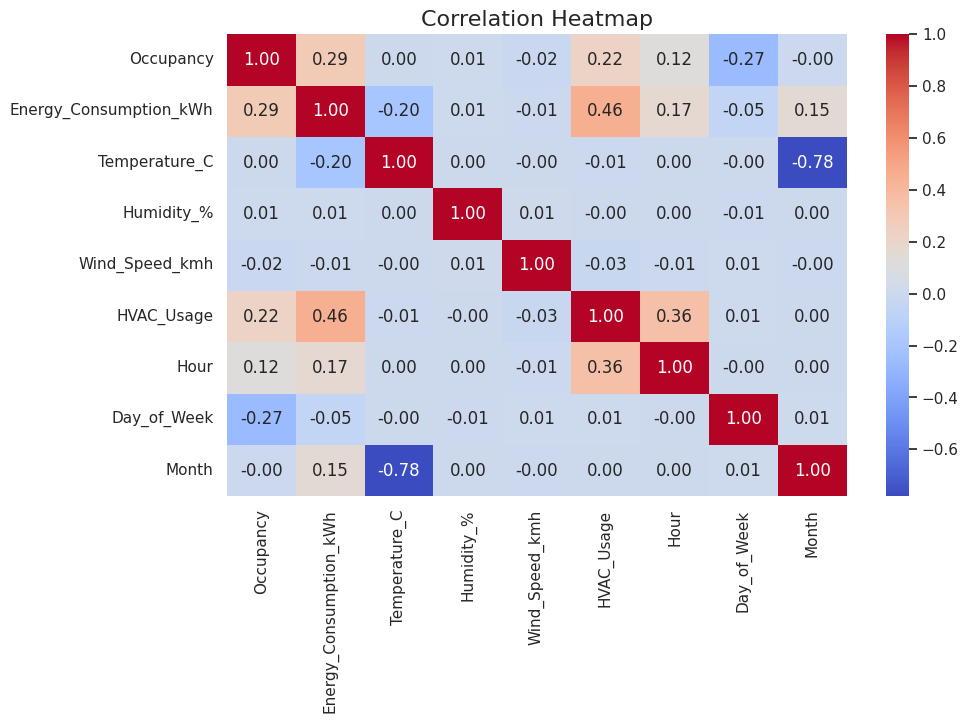

In [107]:
plt.figure(figsize=(10, 6))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()



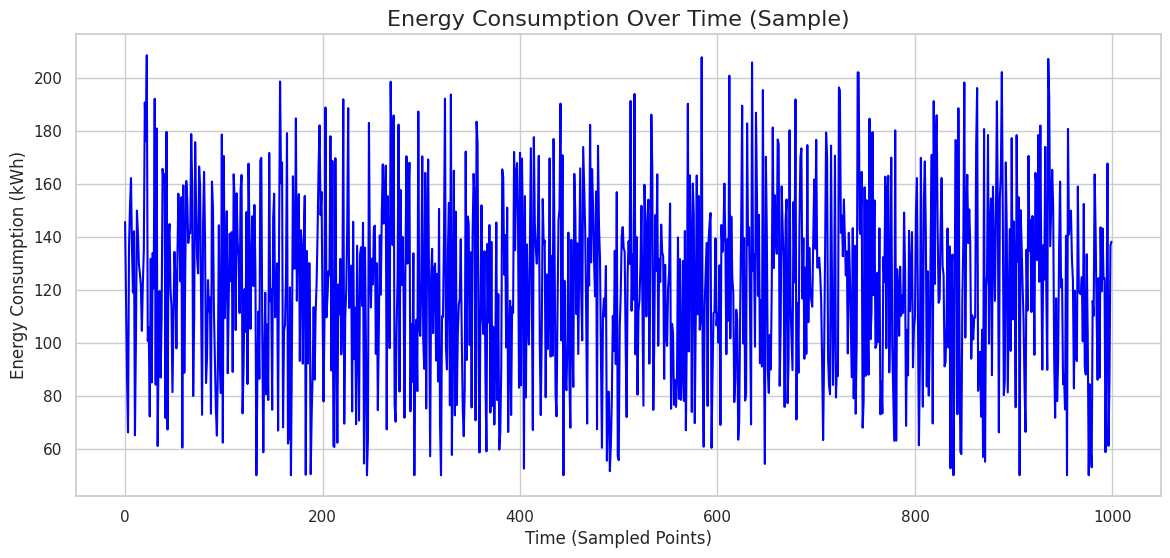

In [108]:
time_series_sample = data.sample(1000, random_state=42)
plt.figure(figsize=(14, 6))
sns.lineplot(x=range(len(time_series_sample)), y=time_series_sample['Energy_Consumption_kWh'], color='blue')
plt.title('Energy Consumption Over Time (Sample)', fontsize=16)
plt.xlabel('Time (Sampled Points)', fontsize=12)
plt.ylabel('Energy Consumption (kWh)', fontsize=12)
plt.show()



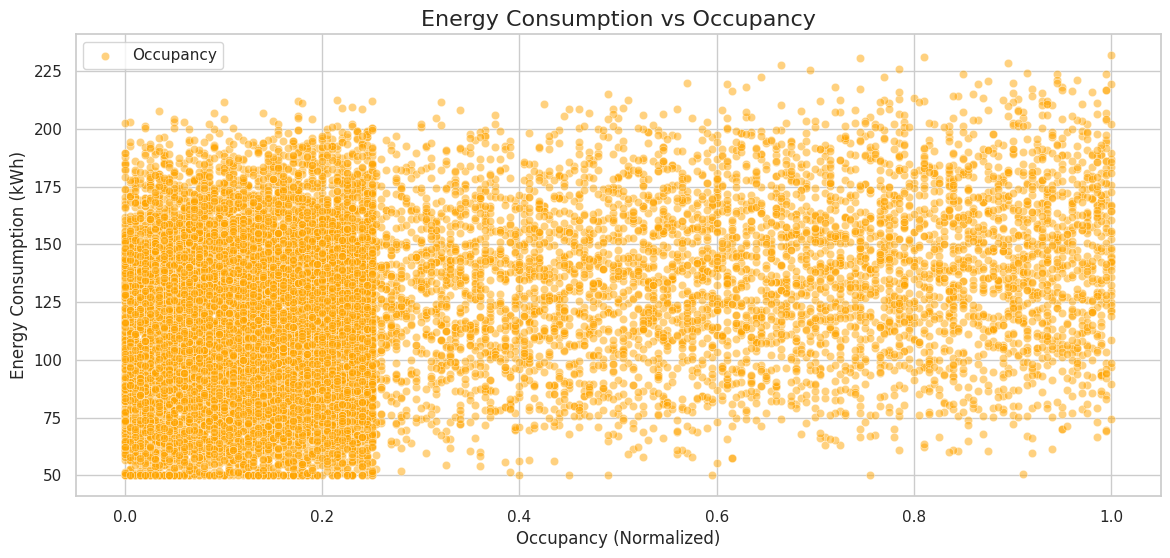

In [109]:
plt.figure(figsize=(14, 6))
sns.scatterplot(data=data, x='Occupancy', y='Energy_Consumption_kWh', alpha=0.5, label='Occupancy', color='orange')
plt.title('Energy Consumption vs Occupancy', fontsize=16)
plt.xlabel('Occupancy (Normalized)', fontsize=12)
plt.ylabel('Energy Consumption (kWh)', fontsize=12)
plt.legend()
plt.show()

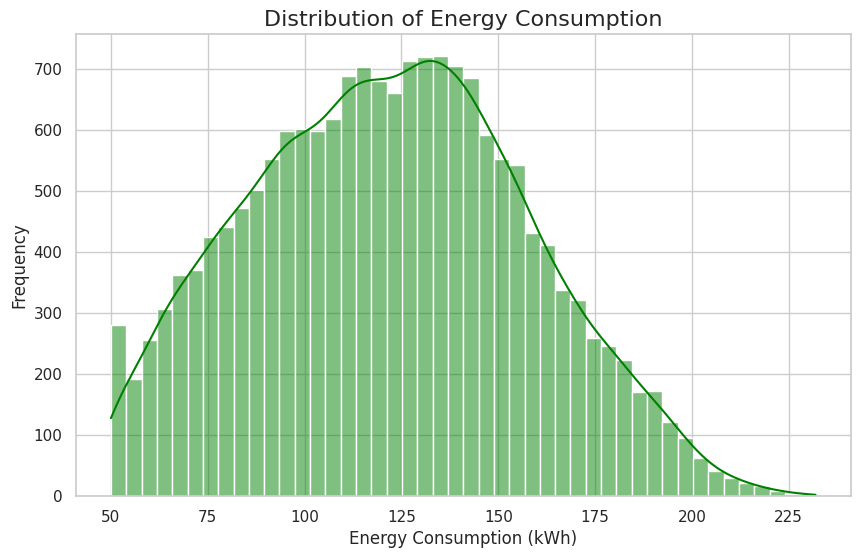

In [110]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Energy_Consumption_kWh'], kde=True, color='green')
plt.title('Distribution of Energy Consumption', fontsize=16)
plt.xlabel('Energy Consumption (kWh)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

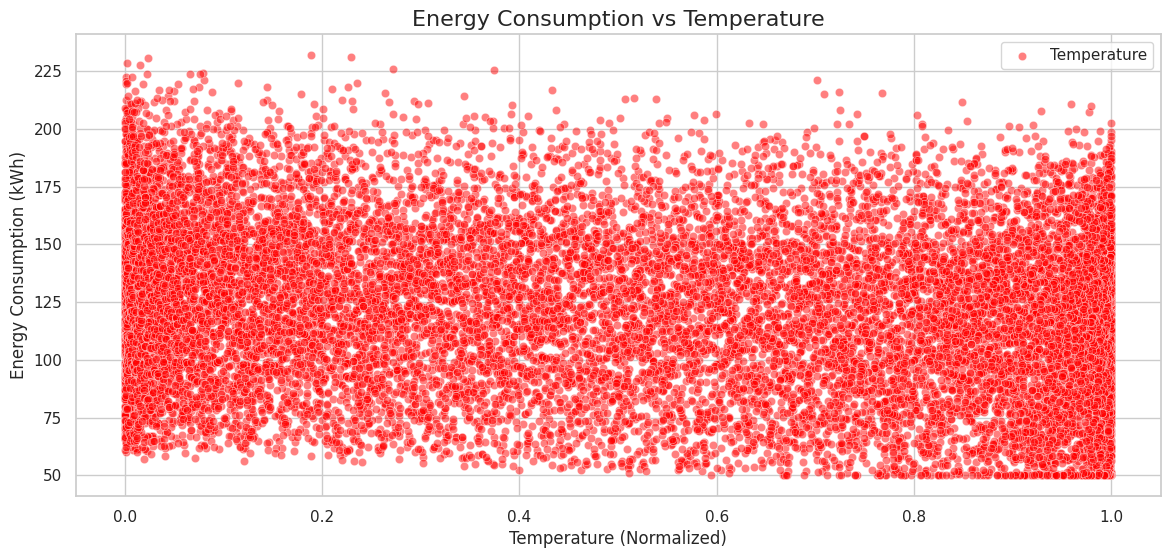

In [111]:
plt.figure(figsize=(14, 6))
sns.scatterplot(data=data, x='Temperature_C', y='Energy_Consumption_kWh', alpha=0.5, label='Temperature', color='red')
plt.title('Energy Consumption vs Temperature', fontsize=16)
plt.xlabel('Temperature (Normalized)', fontsize=12)
plt.ylabel('Energy Consumption (kWh)', fontsize=12)
plt.legend()
plt.show()

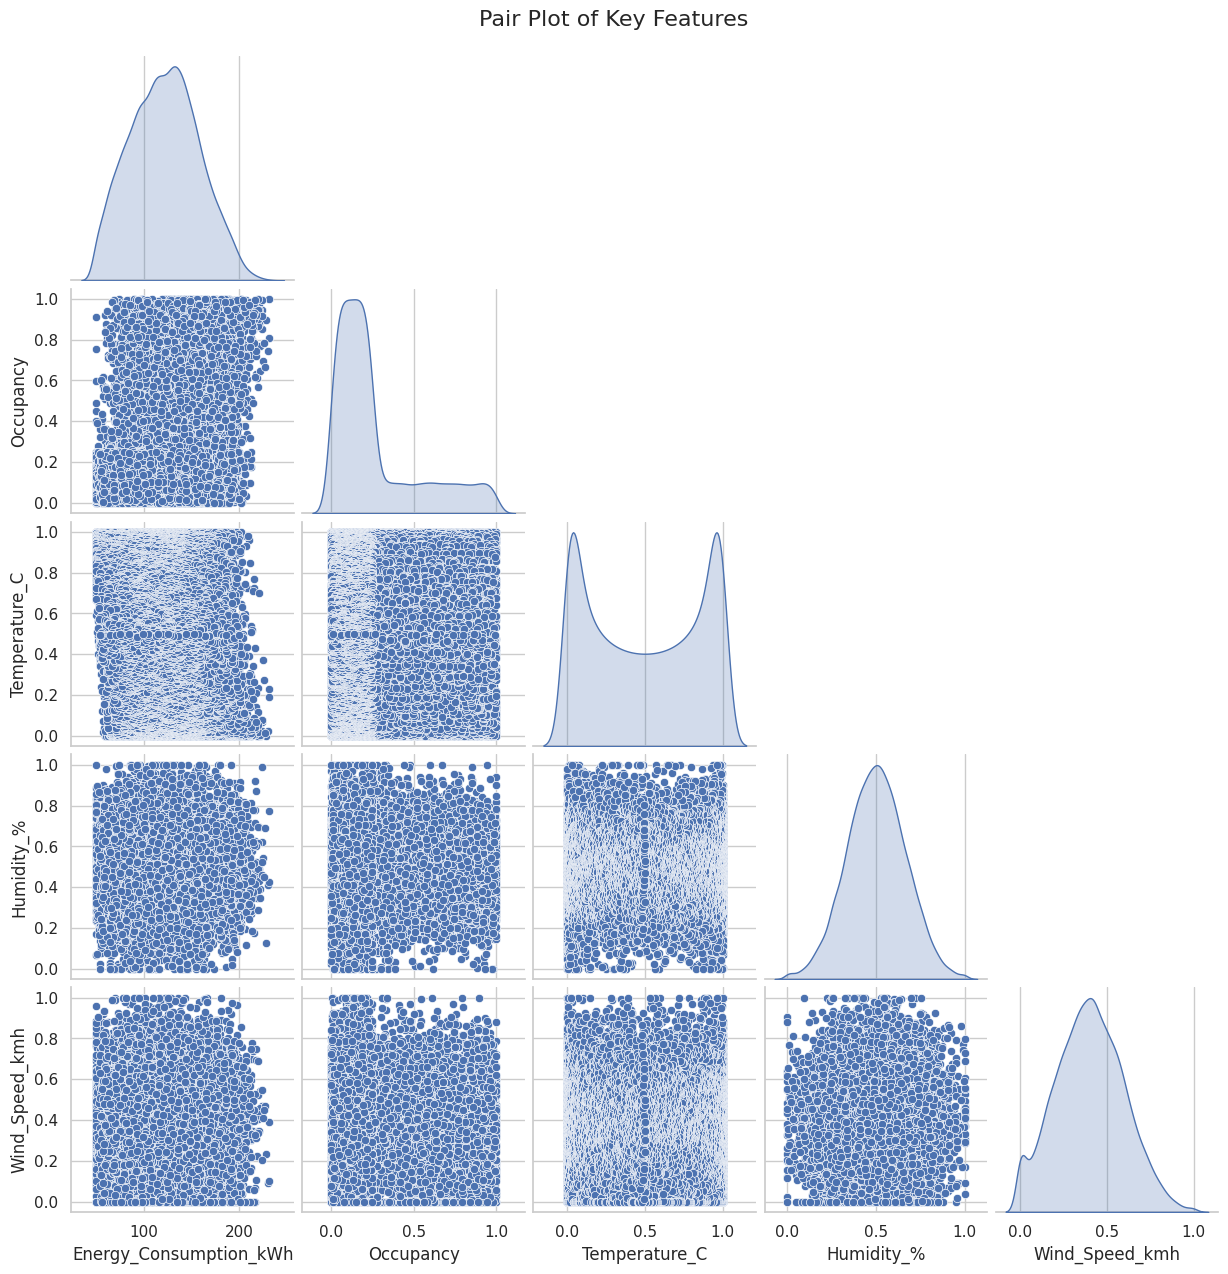

In [112]:
sns.pairplot(data, vars=['Energy_Consumption_kWh', 'Occupancy', 'Temperature_C', 'Humidity_%', 'Wind_Speed_kmh'], diag_kind='kde', corner=True)
plt.suptitle('Pair Plot of Key Features', y=1.02, fontsize=16)
plt.show()

In [113]:
# prompt: Perform linear regression model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define features (X) and target variable (y)
X = data[['Occupancy', 'Temperature_C', 'Humidity_%', 'Wind_Speed_kmh', 'Hour', 'Day_of_Week', 'Month']]
y = data['Energy_Consumption_kWh']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 1070.1074382709496
R-squared: 0.14528846915707772


In [114]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14016 entries, 17440 to 15795
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Occupancy       14016 non-null  float64
 1   Temperature_C   14016 non-null  float64
 2   Humidity_%      14016 non-null  float64
 3   Wind_Speed_kmh  14016 non-null  float64
 4   Hour            14016 non-null  int32  
 5   Day_of_Week     14016 non-null  int32  
 6   Month           14016 non-null  int32  
dtypes: float64(4), int32(3)
memory usage: 711.8 KB


In [115]:
X_train.columns


Index(['Occupancy', 'Temperature_C', 'Humidity_%', 'Wind_Speed_kmh', 'Hour',
       'Day_of_Week', 'Month'],
      dtype='object')

In [116]:
import numpy as np

# Your input array
input_array = np.array([21.0, 22.0, 54.96714153, 10.60174958, 0, 7, 1])

# Reshaping the array to be 2D
input_array_reshaped = input_array.reshape(1, -1)

# Using model.predict with the reshaped array
prediction = model.predict(input_array_reshaped)
print(prediction)

[517.41892924]


In [123]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Define features and target
X = data.drop(columns=['Energy_Consumption_kWh'])
y = data['Energy_Consumption_kWh']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f"Metrics for Random Forest Model:")
print(f"Mean Squared Error (MSE): {mae:.4f}")
print(f"Mean Absolute Error (MAE): {mse:.4f}")
print(f"R-squared (R²): {rmse:.4f}")

Metrics for Random Forest Model:
Mean Squared Error (MSE): 25.7196
Mean Absolute Error (MAE): 926.0522
R-squared (R²): 30.4311


In [119]:
import numpy as np

# Your input array
input_array = np.array([21.0, 22.0, 54.96714153, 10.60174958, 0,0, 7, 1])

# Reshaping the array to be 2D
input_array_reshaped = input_array.reshape(1, -1)

# Using model.predict with the reshaped array
prediction = rf_model.predict(input_array_reshaped)
print(prediction)

[120.82797662]


In [120]:
# prompt: Apply polynomial regression which best suits our dataset

from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features
poly = PolynomialFeatures(degree=2) # You can adjust the degree
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train a linear regression model on the polynomial features
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Make predictions
y_pred_poly = poly_model.predict(X_test_poly)

# Evaluate the polynomial regression model
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"Polynomial Regression - Mean Squared Error: {mse_poly}")
print(f"Polynomial Regression - R-squared: {r2_poly}")

Polynomial Regression - Mean Squared Error: 887.7785752924647
Polynomial Regression - R-squared: 0.29091738081569585
